This dataset contains a weather report of the whole year of <b>2012</b> of <b>Vancouver, Canada</b>. It includes information on the daily temperature, dew point temperature, humidity, visibility, air pressure and wind speed. The dataset can be used to answer questions about the average temperature in Vancouver, the wettest month of the year, or the windiest day of the year. This information could be useful for people who are planning to visit Vancouver or who are interested in the city's climate. 

In [63]:
import pandas as pd  #To load Datasets and process Data
import numpy as np  #For linear Algebra
import matplotlib.pyplot as plt #For ploting
import seaborn as sns #For Ploting
import datetime as dt  #To Process date and time

In [64]:
#Loading Datasets as dt
df = pd.read_csv("weather.csv") 

In [65]:
df.head() 

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [66]:
df.shape

(8784, 8)

In [67]:
df.duplicated().sum()  #Finding Duplicates 

0

In [68]:
df.isna().sum() #Finding null value

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [70]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [71]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])  #Changing the Data type of "Date/Time" columns

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [73]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [74]:
#Renaming "Date/Time" columns to "Datetime"
df.rename(columns = {
    "Date/Time":"Datetime"
}, inplace = True)

In [75]:
df.head()

,Datetime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [76]:
#Extractime Time, Day and Month from datetime column
df.insert(1, "Time", df["Datetime"].dt.time)
df.insert(2, "Day", df["Datetime"].dt.day)
df.insert(3, "Month", df["Datetime"].dt.month)

In [77]:
def monthname(value):
    value = str(value)
    if value == "1" :
        return value.replace("1", "January")
    elif value == "2" :
        return value.replace("2", "February")
    elif value == "3" :
        return value.replace("3", "March")
    elif value == "4" :
        return value.replace("4", "April")
    elif value == "5" :
        return value.replace("5", "May")
    elif value == "6" :
        return value.replace("6", "June")
    elif value == "7" :
        return value.replace("7", "July")
    elif value == "8" :
        return value.replace("8", "August")
    elif value == "9" :
        return value.replace("9", "September")
    elif value == "10" :
        return value.replace("10", "October")
    elif value == "11" :
        return value.replace("11", "November")
    else:
        return value.replace("12", "December")

df["Month"] = df["Month"].apply(monthname)

In [78]:
df.head()

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,02:00:00,1,January,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,03:00:00,1,January,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,04:00:00,1,January,-1.5,-3.3,88,7,4.8,101.23,Fog


## Average Tempreture of a Month:

In [79]:
df["Temp_C"].mean()

8.798144353369764

In [80]:
temp = df[["Month", "Temp_C"]]
ave_temp = temp.groupby(["Month"], as_index = False, sort = False).mean()
ave_temp["Temp_C"] = ave_temp["Temp_C"].round(2)

In [81]:
ave_temp

,Month,Temp_C
0,January,-7.37
1,February,-4.22
2,March,3.12
3,April,7.01
4,May,16.24
5,June,20.13
6,July,22.79
7,August,22.28
8,September,16.48
9,October,10.95


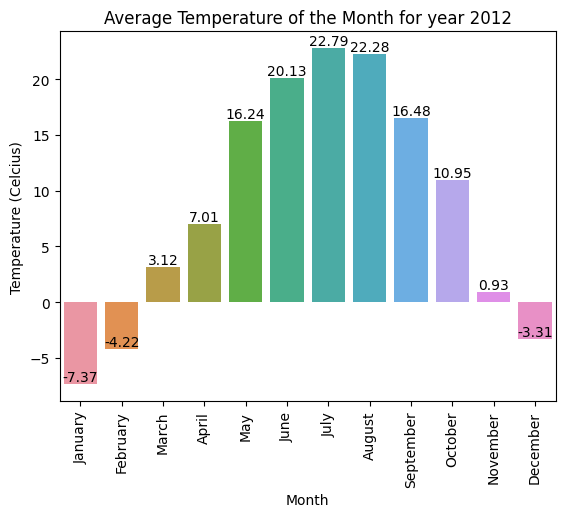

In [82]:
sns.barplot(x = "Month", y = "Temp_C", data = ave_temp)
plt.title("Average Temperature of the Month for year 2012")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Temperature (Celcius)")
for i in range(len(ave_temp)):
    plt.text(i, round(ave_temp["Temp_C"][i], 2), ave_temp["Temp_C"][i], ha="center", va="bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Average Temperature</b> of every month for <b>Year 2012</b> in <b>Vancouver, Canada</b>. We can see that the Average Temperature was <b>8.8°C</b> in Year 2012. We can also see that <b>Highest Average Temperature</b> was <b>22.79°C</b> in <b>July</b> month and <b>Lowest Average Temperature</b> was <b>-7.37°C</b> in <b>January</b> month. So, in <b>Vancouver, Canada</b>, <b>January</b> was the <b>Coldest</b> and <b>july</b> was the <b>Hottest</b> month of the <b>Year 2012</b>.

<br>

## Lowest Temperature of a Month:

In [83]:
min_temp = temp.groupby(["Month"], as_index = False, sort = False).min()

In [84]:
min_temp

,Month,Temp_C
0,January,-23.3
1,February,-16.9
2,March,-16.2
3,April,-3.0
4,May,4.6
5,June,9.5
6,July,12.4
7,August,10.5
8,September,4.9
9,October,-1.9


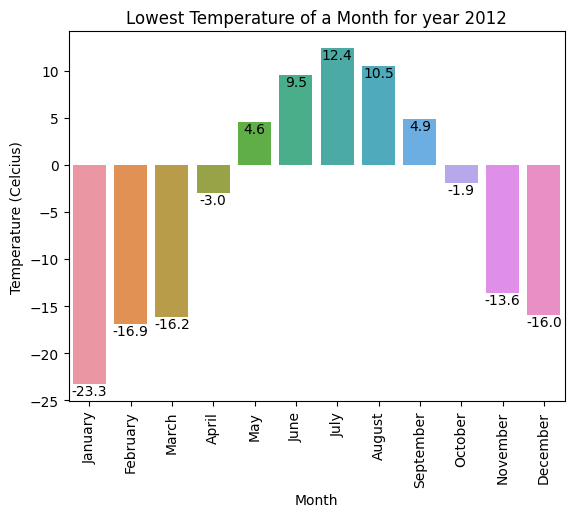

In [85]:
sns.barplot(x = "Month", y = "Temp_C", data = min_temp)
plt.xticks(rotation = 90)
plt.title("Lowest Temperature of a Month for year 2012")
plt.xlabel("Month")
plt.ylabel("Temperature (Celcius)")
for i in range(len(min_temp)):
    plt.text(i, min_temp["Temp_C"][i], min_temp["Temp_C"][i], ha = "center", va = "top")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Lowest Temperature of Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Lowest Temperature</b> for Year 2012 was recorded in <b>January</b> which was <b>-23.3°C</b>.

<br>

## Highest Temperature of a Month:

In [86]:
max_temp = temp.groupby(["Month"], as_index = False, sort = False).max()

In [87]:
max_temp

,Month,Temp_C
0,January,5.3
1,February,6.1
2,March,25.5
3,April,27.8
4,May,31.2
5,June,33.0
6,July,33.0
7,August,32.8
8,September,28.4
9,October,21.1


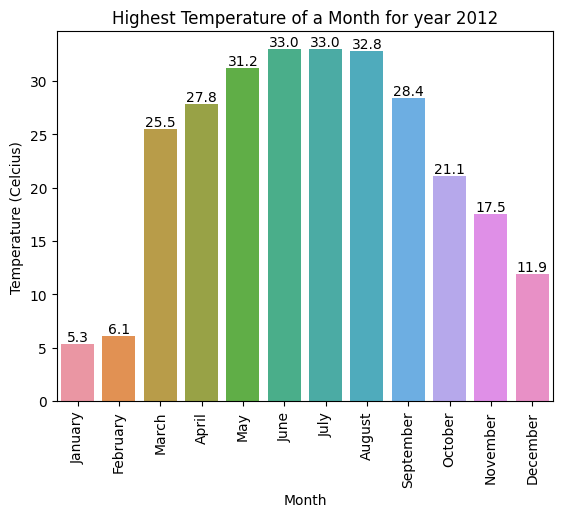

In [88]:
sns.barplot(x = "Month", y = "Temp_C", data = max_temp)
plt.title("Highest Temperature of a Month for year 2012")
plt.xlabel("Month")
plt.ylabel("Temperature (Celcius)")
plt.xticks(rotation = 90)
for i in range(len(max_temp)):
    plt.text(i, max_temp["Temp_C"][i], max_temp["Temp_C"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Highest Temperature of Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Highest Temperature</b> for Year 2012 was observed simultaneously in <b>June</b> and <b>July</b> which was <b>33.0°C</b>.

<br>

## Average Relative Humidity of a Month:

In [89]:
df["Rel Hum_%"].mean()

67.43169398907104

In [90]:
hum = df[["Month","Rel Hum_%"]]

In [91]:
ave_hum = hum.groupby(["Month"], as_index = False, sort = False).mean()
ave_hum["Rel Hum_%"] = ave_hum["Rel Hum_%"].round(2)
ave_hum

,Month,Rel Hum_%
0,January,68.38
1,February,68.96
2,March,64.86
3,April,56.15
4,May,61.76
5,June,60.64
6,July,62.02
7,August,67.94
8,September,71.17
9,October,75.73


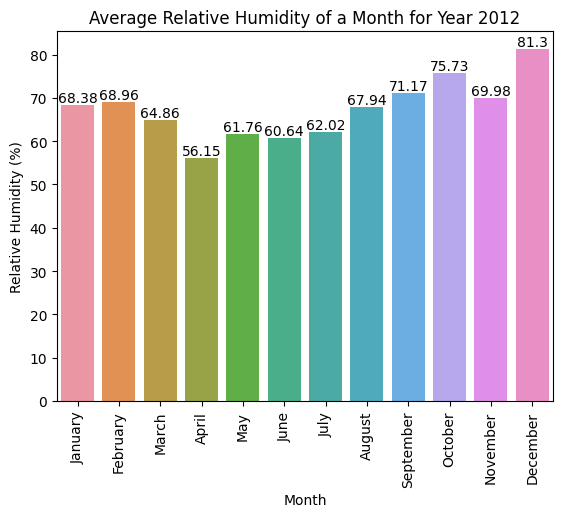

In [92]:
sns.barplot(x="Month", y = "Rel Hum_%", data = ave_hum)
plt.title("Average Relative Humidity of a Month for Year 2012")
plt.xlabel("Month")
plt.ylabel("Relative Humidity (%)")
plt.xticks(rotation = 90)
for i in range(len(ave_hum)):
    plt.text(i, ave_hum["Rel Hum_%"][i], ave_hum["Rel Hum_%"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Average Relative Humidity</b> of every month for <b>Year 2012</b> in <b>Vancouver, Canada</b>. We can see that the Average Relative Humidity was <b>67.43%</b> in Year 2012. We can also see that <b>Highest Average Relative Humidity</b> was <b>81.3%</b> in <b>December</b> month and <b>Lowest Average Relative Humidity</b> was <b>56.15</b> in <b>January</b> month.

<br>

## Highest Relative Humidity of a Month:

In [93]:
df.head()

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,02:00:00,1,January,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,03:00:00,1,January,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,04:00:00,1,January,-1.5,-3.3,88,7,4.8,101.23,Fog


In [94]:
high_hum = hum.groupby(["Month"], as_index = False, sort = False).max()
high_hum

,Month,Rel Hum_%
0,January,93
1,February,94
2,March,100
3,April,94
4,May,95
5,June,90
6,July,98
7,August,99
8,September,100
9,October,100


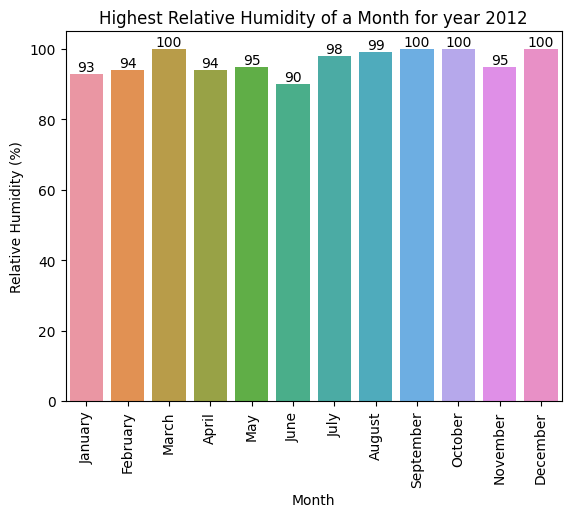

In [95]:
sns.barplot(x="Month", y = "Rel Hum_%", data = high_hum)
plt.title("Highest Relative Humidity of a Month for year 2012")
plt.xlabel("Month")
plt.ylabel("Relative Humidity (%)")
plt.xticks(rotation = 90)
for i in range(len(high_hum)):
    plt.text(i, high_hum["Rel Hum_%"][i], high_hum["Rel Hum_%"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Highest Relative Humidity of Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Highest Relative Humidity</b> for Year 2012 was observed simultaneously in <b>March, September, October</b> and <b>December</b> which was <b>100%</b>.

<br>

## Lowest Humidity of a Month:

In [96]:
low_hum = hum.groupby(["Month"], as_index= False, sort = False).min()
low_hum

,Month,Rel Hum_%
0,January,42
1,February,37
2,March,18
3,April,21
4,May,18
5,June,24
6,July,26
7,August,35
8,September,29
9,October,37


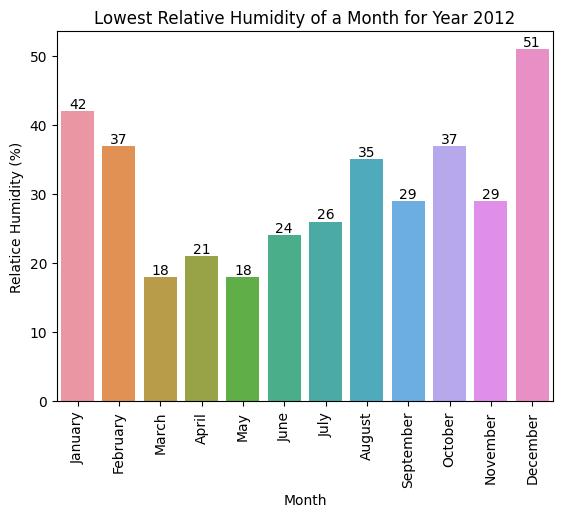

In [97]:
sns.barplot(x = "Month", y = "Rel Hum_%", data = low_hum)
plt.title("Lowest Relative Humidity of a Month for Year 2012")
plt.xlabel("Month")
plt.ylabel("Relatice Humidity (%)")
plt.xticks(rotation = 90)
for i in range(len(low_hum)):
    plt.text(i, low_hum["Rel Hum_%"][i], low_hum["Rel Hum_%"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Lowest Relative Humidity of Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Highest Relative Humidity</b> for Year 2012 was observed simultaneously in <b>March</b> and <b>May</b> which was <b>18%</b>.

<b>
   

## Highest Visibility of a Month:

In [98]:
df.head(2)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog


In [99]:
vis = df[["Month", "Visibility_km"]]

In [100]:
high_vis = vis.groupby(["Month"], as_index = False, sort = False).max()
high_vis

,Month,Visibility_km
0,January,48.3
1,February,48.3
2,March,48.3
3,April,48.3
4,May,48.3
5,June,48.3
6,July,48.3
7,August,48.3
8,September,48.3
9,October,48.3


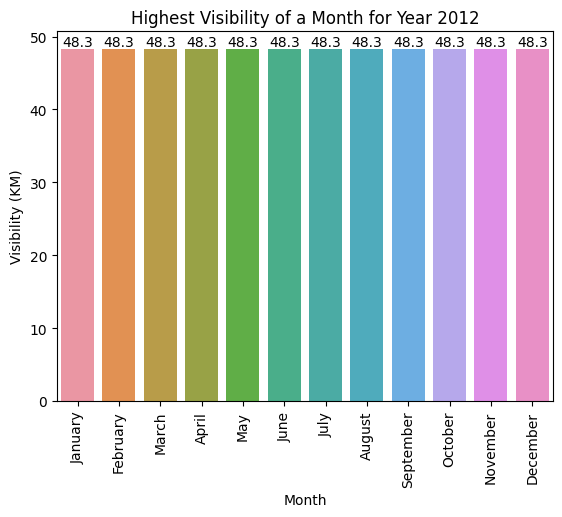

In [101]:
sns.barplot(x = "Month", y = "Visibility_km", data = high_vis)
plt.title("Highest Visibility of a Month for Year 2012")
plt.xlabel("Month")
plt.ylabel("Visibility (KM)")
plt.xticks(rotation = 90)
for i in range(len(high_vis)):
    plt.text(i, high_vis["Visibility_km"][i], high_vis["Visibility_km"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Highest Visibility of a  Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Highest Visibility</b> was observed 48.3 KM for <b>all Months</b> in Year 2012.

<br>

## Lowest Visibility of a Month

In [102]:
low_vis = vis.groupby(["Month"], as_index = False, sort = False).min()
low_vis

,Month,Visibility_km
0,January,0.6
1,February,0.8
2,March,0.2
3,April,8.0
4,May,0.4
5,June,4.8
6,July,3.2
7,August,4.8
8,September,6.4
9,October,0.4


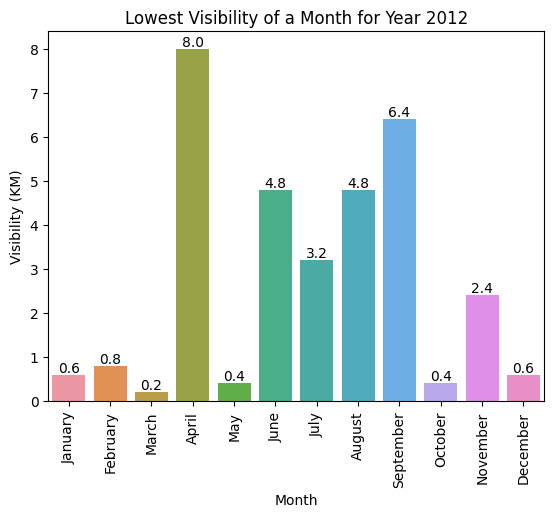

In [103]:
sns.barplot(x = "Month", y = "Visibility_km", data = low_vis)
plt.title("Lowest Visibility of a Month for Year 2012")
plt.xlabel("Month")
plt.ylabel("Visibility (KM)")
plt.xticks(rotation = 90)
for i in range(len(low_vis)):
    plt.text(i, low_vis["Visibility_km"][i], low_vis["Visibility_km"][i], ha = "center", va = "bottom")
plt.show()

<br>

The <b>Barplot</b> shows the <b>Lowest Visibility of a  Month</b> for <b>Year 2012</b>. From the plot, we can see that the <b>Lowest Visibility</b>  for Year 2012 was observed in <b>March</b> which was <b>0.2KM</b>

<br>

## Line plot of Temperature, Humidity and Visibility

In [104]:
df.head(2)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog


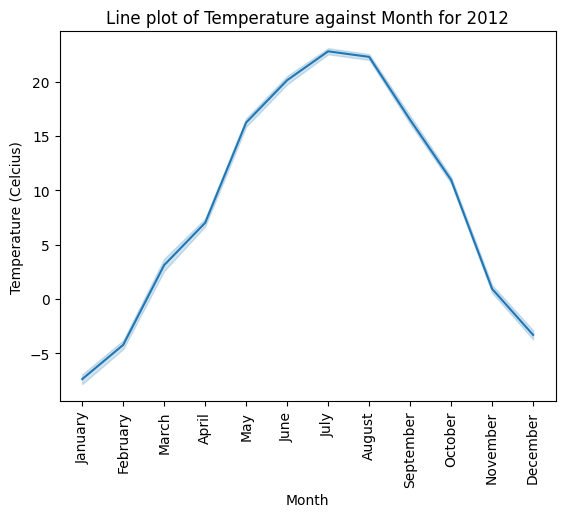

In [105]:
sns.lineplot(x = "Month", y = "Temp_C", data = df)
plt.xticks(rotation = 90)
plt.title("Line plot of Temperature against Month for 2012")
plt.xlabel("Month")
plt.ylabel("Temperature (Celcius)")
plt.show()

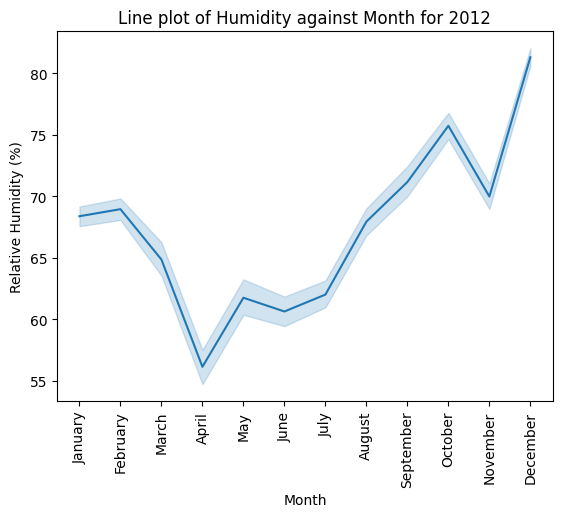

In [106]:
sns.lineplot(x = "Month", y = "Rel Hum_%", data = df)
plt.xticks(rotation = 90)
plt.title("Line plot of Humidity against Month for 2012")
plt.xlabel("Month")
plt.ylabel("Relative Humidity (%)")
plt.show()

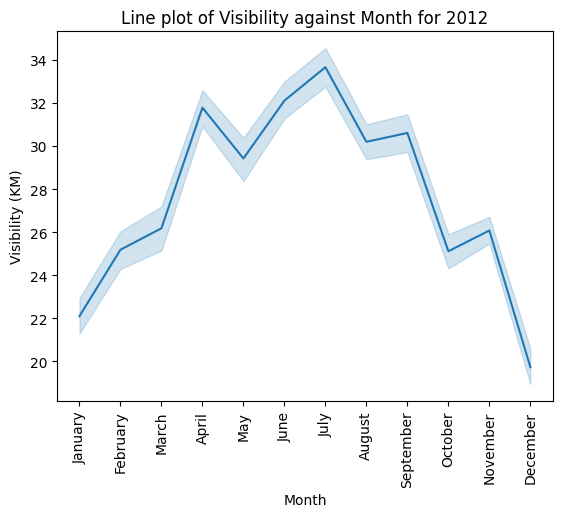

In [107]:
sns.lineplot(x = "Month", y = "Visibility_km", data = df)
plt.xticks(rotation = 90)
plt.title("Line plot of Visibility against Month for 2012")
plt.xlabel("Month")
plt.ylabel("Visibility (KM)")
plt.show()

## Weather Conditions when visibility is High:

In [108]:
df.head(2)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog


In [109]:
weath = df[["Weather", "Visibility_km"]]
weath_vis = weath.groupby(["Weather"], as_index = False, sort = False).max()
weath_vis.head(15)

,Weather,Visibility_km
0,Fog,9.7
1,"Freezing Drizzle,Fog",8.0
2,Mostly Cloudy,48.3
3,Cloudy,48.3
4,Rain,48.3
5,Rain Showers,48.3
6,Mainly Clear,48.3
7,Snow Showers,48.3
8,Snow,25.0
9,Clear,48.3


In [110]:
high_weath_vis = weath_vis.sort_values(by = "Visibility_km", ascending=False).head(10)
high_weath_vis

,Weather,Visibility_km
2,Mostly Cloudy,48.3
3,Cloudy,48.3
4,Rain,48.3
5,Rain Showers,48.3
6,Mainly Clear,48.3
7,Snow Showers,48.3
9,Clear,48.3
46,"Rain,Snow Grains",25.0
30,"Thunderstorms,Rain Showers",25.0
8,Snow,25.0


In [111]:
Weather = high_weath_vis["Weather"].tolist()
Weather

['Mostly Cloudy',
 'Cloudy',
 'Rain',
 'Rain Showers',
 'Mainly Clear',
 'Snow Showers',
 'Clear',
 'Rain,Snow Grains',
 'Thunderstorms,Rain Showers',
 'Snow']

In [112]:
Visibility = high_weath_vis["Visibility_km"].tolist()
Visibility

[48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 25.0, 25.0, 25.0]

In [113]:
weather_high_vis = pd.DataFrame({
    "Weather Condition":Weather,
    "Visibility":Visibility
})

In [114]:
weather_high_vis

,Weather Condition,Visibility
0,Mostly Cloudy,48.3
1,Cloudy,48.3
2,Rain,48.3
3,Rain Showers,48.3
4,Mainly Clear,48.3
5,Snow Showers,48.3
6,Clear,48.3
7,"Rain,Snow Grains",25.0
8,"Thunderstorms,Rain Showers",25.0
9,Snow,25.0


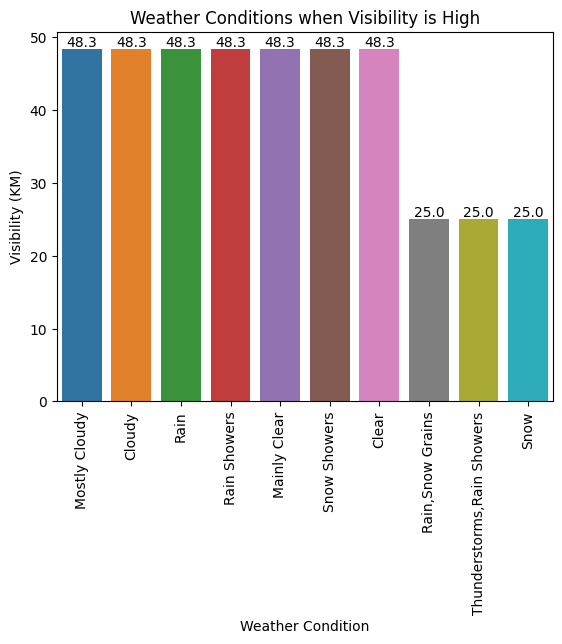

In [115]:
sns.barplot(x = "Weather Condition", y = "Visibility", data = weather_high_vis)
plt.title("Weather Conditions when Visibility is High")
plt.xticks(rotation = 90)
plt.ylabel("Visibility (KM)")
for i in range(len(weather_high_vis)):
    plt.text(i, weather_high_vis["Visibility"][i], weather_high_vis["Visibility"][i], ha = "center", va = "bottom")
plt.show()

## Best Months for Agriculture:

In [116]:
df.columns

Index(['Datetime', 'Time', 'Day', 'Month', 'Temp_C', 'Dew Point Temp_C',
       'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa',
       'Weather'],
      dtype='object')

In [117]:
weth = df[["Month", 'Temp_C', 'Dew Point Temp_C',
       'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
best_weather = weth.groupby(["Month"], as_index= False, sort = False).mean()
best_weather

,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,January,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
1,February,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
2,March,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255
3,April,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833
4,May,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164
5,June,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222
6,July,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333
7,August,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097
8,September,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903
9,October,10.954973,6.533468,75.731183,15.475806,25.111022,100.909368


<br>
Based on the data table, the best months for agriculture are <b>June, July, and August</b>. This is because these months have the following ideal conditions for agriculture:

<b>High temperature:</b> Crops need <b>warm temperatures</b> to grow. The average temperatures in <b>June, July, and August</b> are <b>20.1°C, 22.8°C, and 22.3°C</b>, respectively.

<b>High dew point temperature:</b> Dew point temperature is the temperature at which water vapor in the air condenses to form dew. <b>High dew point temperatures</b> indicate that there is a lot of moisture in the air, which is beneficial for crops. The average dew point temperatures in <b>June, July, and August</b> are <b>11.8°C, 14.6°C, and 15.6°C</b>, respectively.

<b>High relative humidity:</b> Relative humidity is the amount of water vapor in the air compared to the maximum amount of water vapor that the air can hold at a given temperature. <b>High relative humidity</b> indicates that there is a lot of moisture in the air, which is beneficial for crops. The average relative humidity in <b>June, July, and August</b> are <b>60.6%, 62%, and 67.9%</b>, respectively.

<b>Low wind speed:</b> Wind can dry out crops and blow them over. The average wind speed in <b>June, July, and August</b> are <b>14.68 km/h, 11.88 km/h, and 13.93 km/h</b>, respectively.

<b>Good visibility:</b> <b>Good visibility</b> is important for farmers to be able to see their crops and machinery. The average visibility in <b><b>June, July, and August</b> are <b>32.1 km, 33.6 km, and 30.2 km</b>, respectively.

<b>Moderate air pressure:</b> Air pressure affects the rate of plant growth. <b>Moderate air pressure</b> is ideal for plant growth. The average air pressure in <b>June, July, and August</b> are <b>100.78 kPa, 100.82 kPa, and 100.92 kPa</b>, respectively.

Therefore, based on the data table, the best months for agriculture are <b>June, July, and August</b>.

<br>
    

## Times When Visibility is Max:

In [118]:
df.head(2)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog


In [119]:
df2 = df.loc[df["Visibility_km"]==df["Visibility_km"].max()]

In [120]:
df2.sample(12)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
4528,2012-07-07 16:00:00,16:00:00,7,July,29.1,15.7,44,17,48.3,100.28,Mostly Cloudy
5795,2012-08-29 11:00:00,11:00:00,29,August,21.9,8.5,42,22,48.3,101.07,Clear
7932,2012-11-26 12:00:00,12:00:00,26,November,-1.3,-10.6,49,24,48.3,101.33,Mainly Clear
4171,2012-06-22 19:00:00,19:00:00,22,June,25.7,11.7,42,11,48.3,100.38,Mostly Cloudy
6732,2012-10-07 12:00:00,12:00:00,7,October,9.2,0.6,55,22,48.3,101.36,Mostly Cloudy
3392,2012-05-21 08:00:00,08:00:00,21,May,24.0,11.1,44,19,48.3,101.69,Mostly Cloudy
2004,2012-03-24 12:00:00,12:00:00,24,March,4.8,-10.3,33,19,48.3,101.80,Cloudy
3015,2012-05-05 15:00:00,15:00:00,5,May,15.4,-1.0,32,6,48.3,101.55,Mainly Clear
2586,2012-04-17 18:00:00,18:00:00,17,April,9.5,-2.8,42,24,48.3,101.79,Mostly Cloudy
4645,2012-07-12 13:00:00,13:00:00,12,July,29.6,13.6,38,24,48.3,101.46,Mainly Clear


In [121]:
df2.to_csv("High Vis Times.csv")

## Relationship between Weather Elements:

In [122]:
df.head(2)

,Datetime,Time,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,00:00:00,1,January,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,01:00:00,1,January,-1.8,-3.7,87,4,8.0,101.24,Fog


In [123]:
new_df = df[['Temp_C', 'Dew Point Temp_C',
       'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]

In [124]:
new_df.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000
